<a href="https://colab.research.google.com/github/samservo09/thesis-svm-tele-triage/blob/main/Copy_of_Text_Classification_SVM_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

! wget https://raw.githubusercontent.com/samservo09/thesis-svm-tele-triage/refs/heads/main/data/500_Reddit_users_posts_labels.csv
# import the corpus
Corpus = pd.read_csv("/content/500_Reddit_users_posts_labels.csv", encoding='latin-1')
# rename columns into small letters
Corpus.columns = Corpus.columns.str.lower()

--2024-11-20 06:28:14--  https://raw.githubusercontent.com/samservo09/thesis-svm-tele-triage/refs/heads/main/data/500_Reddit_users_posts_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3622335 (3.5M) [text/plain]
Saving to: ‘500_Reddit_users_posts_labels.csv’

500_Reddit_users_po 100%[===================>]   3.45M  --.-KB/s    in 0.09s   

2024-11-20 06:28:15 (39.9 MB/s) - ‘500_Reddit_users_posts_labels.csv’ saved [3622335/3622335]



# Text Classification: SVM Explained
Hello people! Welcome to this kernel. In this kernel I am going to develop a sentiment analyser using **Support Vector Machine** algorithm and **Bag of Words** representation.

Before starting, I have to say that: Using deep learning approachs such as **Recurrent Neural Networks** are better to classify texts, but when we have a small dataset, traditional machine learning may be good.

And if you interested in text classification with traditional machine learning, you might want to use a lazy algorithm to filter spam emails. If you, you can check my **Naive Bayes** kernel. In that kernel I've expalined everything (text processing and deploying a sklearn model included) detailed. Here is the link: https://www.kaggle.com/mehmetlaudatekman/filtering-spam-e-mails-power-of-naive-bayes

# Notebook Content
1. Preparing the Environment
    * Importing Libraries
    * Importing Datasets
1. Simply Explained: Support Vector Machine
1. Data Overview
    * Frequency Distributions with NLTK
1. Data Preprocessing
    * Cleaning Links
    * Cleaning Everything Except Alphabetical and Numerical Characters
    * Tokenizing and Lemmatizing
    * Removing Stopwords
    * Joining Prepared Strings
    * Bag of Words Approach
1. Support Vector Machine Classifier Modeling
    * Fitting SVMC Model with SKLearn
    * Testing Model
1. Conclusion


# Preparing the Environment
In this kernel, I will use **sklearn** to develop a model and vectorize the texts; **nltk** to preprocess texts and data overview.

And I will use several libraries.

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'cleaned_post' contains the cleaned text data and 'Label' contains the labels
X = Corpus['post']
y = Corpus['label']
from sklearn.model_selection import train_test_split


# Assuming 'cleaned_post' contains the cleaned text data and 'Label' contains the labels
X = Corpus['post']
y = Corpus['label']

# Split into training and temporary sets (80% train, 20% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train), len(y_train))
print("Testing set size:", len(X_test), len(y_test))

Training set size: 400 400
Testing set size: 100 100


In [4]:
train_set = pd.concat([X_train,y_train],axis=1)
test_set = pd.concat([X_test,y_test],axis=1)

# Simply Explained: Support Vector Machine
Support Vector Machine (after this I will say SVM) is a machine learning approach that has a classifier and regressor, in this section I will cover classifier.

There are versions of SVM such as Linear SVM. In linear SVM, model fits **N** lines to split classes from each other (N is class count - 1 ). We will say **Decision Lines** to these lines.

![image.png](attachment:image.png)

And in order to make classifier durable, **decision line** must be in the closest position to **support points** of each class.

I know, I have not explain what is support point. Support point (also support vectors) is the points that nearest to the decision line. You can see them in the graph above.

And sometimes our dataset may be non-linear. However we can still use SVM to classify non-linear dataset. In order to do this we'll use **kernel tricks**. If we add a new dimension to data we may classify it using lines. Let's take a look at the images below: (thanks for images, here is the link of article [in Turkish])

![](https://miro.medium.com/max/700/1*u7ogmOy2vQDjgw7Pou0hoA.png)

In this example we've added a new dimension (Z) to data and now we can classify it using a line.

Everything you need to know about basics of Support Vector Machine was this. Let's start to implement!

# Data Overview
In this section we will take a look at the data. And in order to do this we will use frequency distrubutions of NLTK.

In [5]:
# Get the unique values of the 'label' column
unique_labels = Corpus['label'].unique()

# Print the unique labels
print("Unique labels:", unique_labels)

Unique labels: ['Supportive' 'Ideation' 'Behavior' 'Attempt' 'Indicator']


In [6]:
behavior = train_set[train_set["label"] == "Behavior"]
behavior_test = test_set[test_set["label"] == "Behavior"]
print(behavior["label"].value_counts())
behavior.head()

label
Behavior    62
Name: count, dtype: int64


,post,label
56,['Wow. You should know that military is one of...,Behavior
464,['Xbox! Add l Lykke Li l . The l are lower cas...,Behavior
281,"['It really is Hyperactive behavior that, isnt...",Behavior
176,['I suppose the thing that sets me off is I fe...,Behavior
203,['Dont frame it as six years ruined. During t...,Behavior


In [7]:
supportive = train_set[train_set["label"] == "Supportive"]
supportive_test = test_set[test_set["label"] == "Supportive"]
print(supportive["label"].value_counts())
supportive.head()

label
Supportive    80
Name: count, dtype: int64


,post,label
249,['Dont look to reddit to solve your problems. ...,Supportive
132,['Dude. Dont do this. You wont be called brave...,Supportive
231,"['Youre not being a bitch, and you dont have t...",Supportive
417,"['Oh my goodness, you have so much on your sho...",Supportive
31,['Since I just agreed to assist you for bacon ...,Supportive


In [8]:
indicator = train_set[train_set["label"] == "Indicator"]
indicator_test = test_set[test_set["label"] == "Indicator"]
print(indicator["label"].value_counts())
indicator.head()


label
Indicator    80
Name: count, dtype: int64


,post,label
301,['Have you tried making things with your hands...,Indicator
229,['Im one of the others that has been checking ...,Indicator
137,"['Hi, following you to this post... Ive been t...",Indicator
247,['Please dont harm yourself. Maybe the reason ...,Indicator
265,"['Thanks for the reply, I used to be pretty go...",Indicator


In [9]:
attempt = train_set[train_set["label"] == "Attempt"]
attempt_test = test_set[test_set["label"] == "Attempt"]
print(attempt["label"].value_counts())
attempt.head()

label
Attempt    32
Name: count, dtype: int64


,post,label
433,['As someone who is just Hyperactive behavior ...,Attempt
25,['To update you guys friend called police in m...,Attempt
237,['I started anti-DP treatment this morning.Fee...,Attempt
271,['To everyone who responded to this post. Than...,Attempt
192,['Ive been hospitalized 3 times. Each time it ...,Attempt


In [10]:
ideation = train_set[train_set["label"] == "Ideation"]
ideation_test = test_set[test_set["label"] == "Ideation"]
print(ideation["label"].value_counts())
ideation.head()

label
Ideation    146
Name: count, dtype: int64


,post,label
19,"['Live for others you say?', 'My trigger. Well...",Ideation
322,['Wonderful :) Didnt work for me. But that fur...,Ideation
332,"['you see, I am in a lot of clubs that I absol...",Ideation
331,['Even if I had insurance to actually see a th...,Ideation
423,['Im sorry. I wouldnt wish something Hyperacti...,Ideation


* Now let's convert labels into integers, I will label negatives as 0, neutrals as 1 and positives as 2.

In [11]:
import warnings as wrn
wrn.filterwarnings('ignore')

behavior["Behavior"] = 0
behavior_test["Behavior"] = 0

supportive["Supportive"] = 1
supportive_test["Supportive"] = 1

indicator["Indicator"] = 2
indicator_test["Indicator]"] = 2

attempt["Attempt"] = 3
attempt_test["Attempt"] = 3

ideation["Ideation"] = 4
ideation_test["Ideation"] = 4

behavior.head()

,post,label,Behavior
56,['Wow. You should know that military is one of...,Behavior,0
464,['Xbox! Add l Lykke Li l . The l are lower cas...,Behavior,0
281,"['It really is Hyperactive behavior that, isnt...",Behavior,0
176,['I suppose the thing that sets me off is I fe...,Behavior,0
203,['Dont frame it as six years ruined. During t...,Behavior,0


* Now I will concatenate train and test, I will split them after processing.

In [12]:
data = pd.concat([behavior,supportive,indicator,attempt,ideation],axis=0)
data_test = pd.concat([behavior_test,supportive_test,indicator_test,attempt_test,ideation_test],axis=0)

data.reset_index(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       400 non-null    int64  
 1   post        400 non-null    object 
 2   label       400 non-null    object 
 3   Behavior    62 non-null     float64
 4   Supportive  80 non-null     float64
 5   Indicator   80 non-null     float64
 6   Attempt     32 non-null     float64
 7   Ideation    146 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 25.1+ KB


In [14]:
data.head()

,index,post,label,Behavior,Supportive,Indicator,Attempt,Ideation
0,56,['Wow. You should know that military is one of...,Behavior,0.0,NaN,NaN,NaN,NaN
1,464,['Xbox! Add l Lykke Li l . The l are lower cas...,Behavior,0.0,NaN,NaN,NaN,NaN
2,281,"['It really is Hyperactive behavior that, isnt...",Behavior,0.0,NaN,NaN,NaN,NaN
3,176,['I suppose the thing that sets me off is I fe...,Behavior,0.0,NaN,NaN,NaN,NaN
4,203,['Dont frame it as six years ruined. During t...,Behavior,0.0,NaN,NaN,NaN,NaN


* Finally everything is ready, we can start examining data with examining random texts.

In [15]:
import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["post"][random_ind]),end="\nLabel: ")
    print(str(data["label"][random_ind]),end="\n\n")


['Thats what Im trying to do. But I have no money. I need to pay off rent in May or all my roommates get evicted.', 'Besides Planned Parenthood, where a friend had told me to go, there isnt really anywhere else to go. And Ive tried practically everything, especially getting a job, but now Im just feeling hopeless. And I cant ask my mother for money anymore.']
Label: Ideation

['You have heard the saying that on planes that you put the oxygen mask on yourself first so you are able to put the oxygen mask on your child.There is a repeating theme in your short paragraph that you dont want to bother anybody. But what exactly do you think committing suicide would do?&gt; I dont want to bother my therapist this early or at all. I can assure you that if you are getting to the edge of the cliff, she wouldnt care if you called at 3:30 a.m.You really need to work on your codependency issues, and then the rest will follow.&gt; I cant tell anyone how low I feel.Yes you can, you just listed excuses 

* And let's take a look at the frequency distributions.

In [16]:
behaviorFD = nltk.FreqDist(word for text in data[data["Behavior"] == 0]["post"] for word in text.lower().split())
supportiveFD = nltk.FreqDist(word for text in data[data["Supportive"] == 1]["post"] for word in text.lower().split())
indicatorFD = nltk.FreqDist(word for text in data[data["Indicator"] == 2]["post"] for word in text.lower().split())
attemptFD = nltk.FreqDist(word for text in data[data["Attempt"] == 3]["post"] for word in text.lower().split())
ideationFD = nltk.FreqDist(word for text in data[data["Ideation"] == 4]["post"] for word in text.lower().split())

* And now we can examine most used words plots.

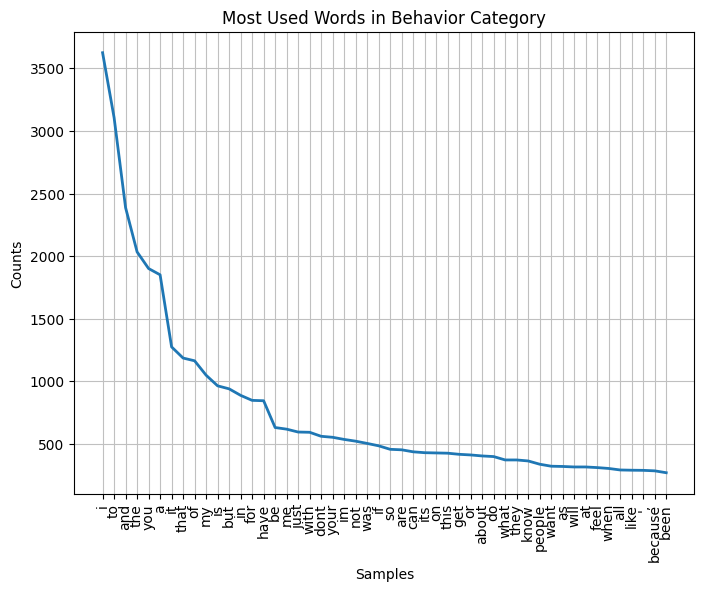

In [17]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Behavior Category")
behaviorFD.plot(50)
plt.show()

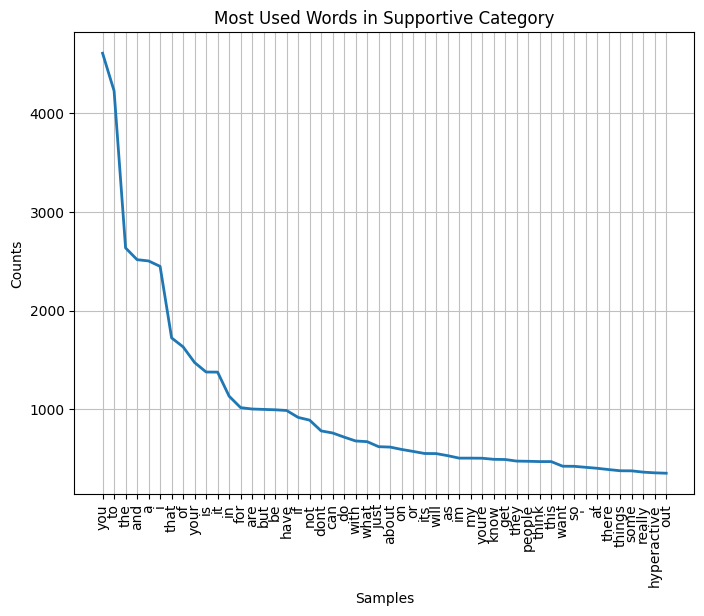

In [18]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Supportive Category")
supportiveFD.plot(50)
plt.show()

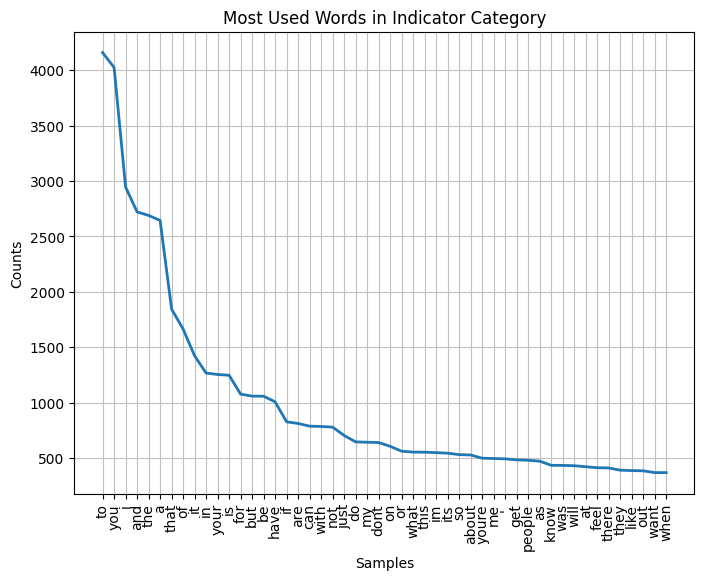

In [19]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Indicator Category")
indicatorFD.plot(50)
plt.show()

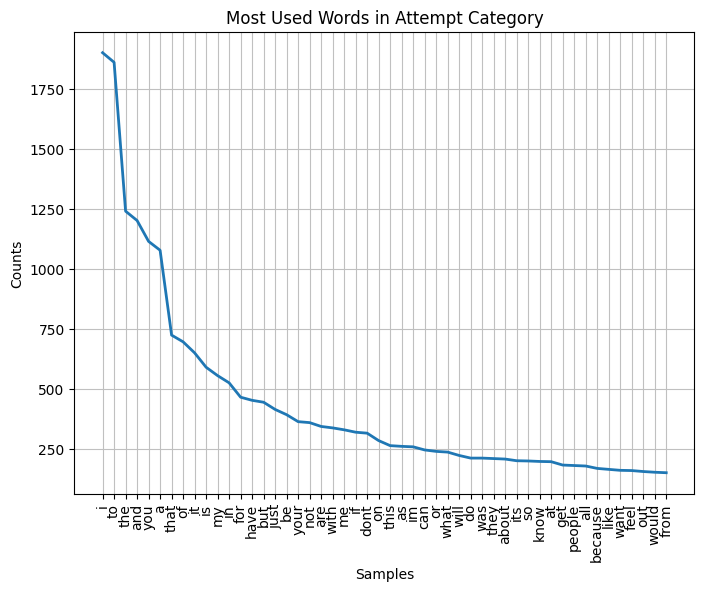

In [20]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Attempt Category")
attemptFD.plot(50)
plt.show()

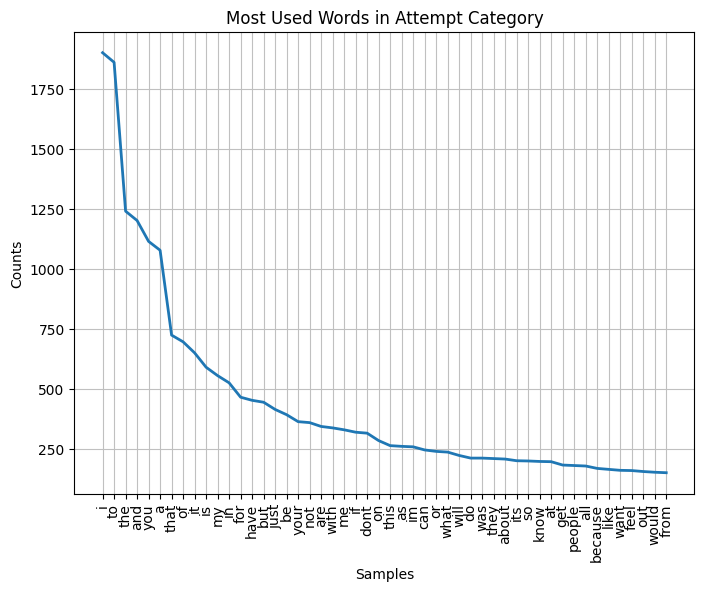

In [21]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Attempt Category")
attemptFD.plot(50)
plt.show()

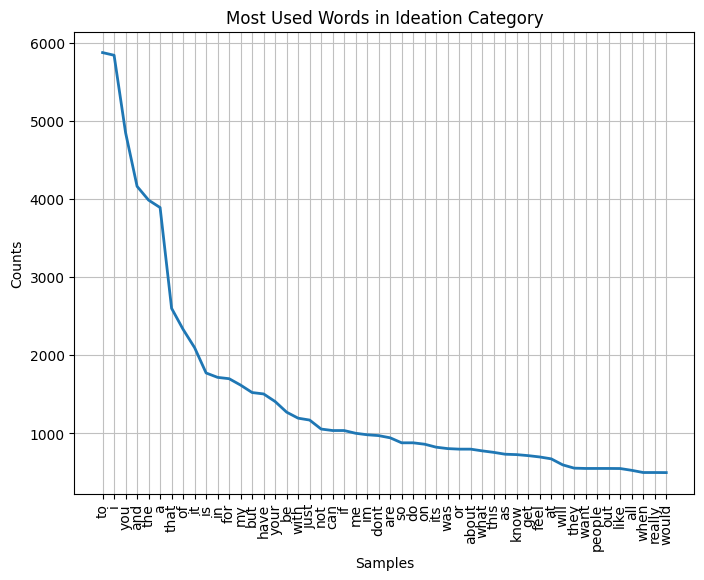

In [22]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Ideation Category")
ideationFD.plot(50)
plt.show()

* Although most of the words are same (we say them stopwords [words that not have a special meaning]) we can see characteristic words such as **panic**

# Data Preprocessing
In this section we will prepare the dataset in order to use in SVM model. Before starting I want to explain processes with 1 line explanations

* Cleaning Links: We'll clean all website links using regular expressions
* Cleaning Everything Except Alphabetical and Numerical Characters: We'll clean unrelevant digits using regular expressions
* Tokenizing and Lemmatizing: We'll split texts into their words and convert words to their base form (dogs=>dog)
* Removing Stopwords: We'll remove words that have no special meaning (such as **the,will,was**)
* Joining Prepared Strings: We'll join the words
* Bag of Words Approach: We'll create a bag of word. In bag of words approach each feature shows whether the text contains the word or not. For instance if our text contains **grocery** word, its **grocery** feature will be 1 if not it will be 0.

If you want to learn more detail about them, you can check my Naive Bayes text classification kernel. Here is the link: https://www.kaggle.com/mehmetlaudatekman/filtering-spam-e-mails-power-of-naive-bayes

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from collections import defaultdict
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# Download necessary NLTK packages (ensure this only runs once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

cleanedData = []

lemma = WordNetLemmatizer()
# Now you can access stopwords
swords = stopwords.words("english")
for text in data["post"]:

    # Cleaning links
    text = re.sub(r'http\S+', '', text)

    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)

    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]

    # Removing stopwords
    text = [word for word in text if word not in swords]

    # Joining
    text = " ".join(text)

    cleanedData.append(text)

In [25]:
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

wow know military one hardest thing life accomplish congrats getting new house wife going military im glad didnt get worse got better good luck friend hobby fishing sport thats think sorry messaging back right away havent blankllama 276 000 teenager try kill every year 5 000 succeed main cause stress bullying failed relationship abuse failed study one among 5 000 kill 13 year old story thank spacehorror youre gifted girlfriend loving family friend thinking killing want dream become reality go see live life take arent gifted like like story article view whole lot different thing listed none story

xbox add l lykke li l l lower cased l im little social fear going er would lead mental ward thats pretty neat live northville thats lake erie area youre lake michigan area think love lana del rey usually song kinda feel feel like green eye wavves line get friend hate ahh give fuck relates give fuck thank much ill message really need talk therapist also psychologist help said really isnt issue 

* Now we can create our bag of words, but before starting I want to give an example:

        ====TEXT====           HELLO  WORLD  BRO  CLEAN  SOME  TEXT  WELCOME       
        Hello world               1     1     0     0      0     0      0
        Hello bro                 1     0     1     0      0     0      0
        Clean some text           0     0     0     1      1     1      0
        You're welcome bro        0     0     1     0      0     0      1
        Welcome to world          0     1     0     0      0     0      1
        
This is a simple bag of words model.

In [26]:
vectorizer = CountVectorizer(max_features=10000)

BOW = vectorizer.fit_transform(cleanedData)


* Everything is ready, we can split our set into train and test.

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["post"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 10000)
(100, 10000)
(300,)
(100,)


# Support Vector Machine Classifier Modeling
Everything is ready, now ve can fit our classifier.

In [28]:
from sklearn.svm import SVC
start_time = time.time()

model = SVC()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 0.49 seconds


* It took almost 13 minutes, I hope its worth it.

In [29]:
predictions = model.predict(x_test)

* Now let's take a look at the accuracy and confusion matrix.

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 0.0%


In [31]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Assuming you have your features in a variable called 'X'
# If not, please replace 'X' with the actual name of your feature variable

# Split data into training and testing sets
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


# Check overall label distribution
print("Overall Label Distribution:")
print(y.value_counts())

# Check training set label distribution
print("\nTraining Set Label Distribution:")
print(Y_train.value_counts())

# Check testing set label distribution
print("\nTesting Set Label Distribution:")
print(y_test.value_counts())

Overall Label Distribution:
label
Ideation      171
Supportive    108
Indicator      99
Behavior       77
Attempt        45
Name: count, dtype: int64

Training Set Label Distribution:
label
Ideation      146
Supportive     80
Indicator      80
Behavior       62
Attempt        32
Name: count, dtype: int64

Testing Set Label Distribution:
label
Supportive    28
Ideation      25
Indicator     19
Behavior      15
Attempt       13
Name: count, dtype: int64


* Our accuracy is 77% Not bad, but I guess we can develop a better model using deep learning.

# Conclusion
Thanks for your attention. In this kernel I have explained what is SVM and how they work and developing a text classifier using SVMs.

If you have any question in your mind, please ask in comment section.

Have a great day!